<a href="https://colab.research.google.com/github/aasem/cvisionmcs/blob/main/optimize_play_gradescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Strategies - Linear Classification (SVM and Softmax) for CIFAR10 Dataset



In [ ]:
!git clone https://github.com/aasem/cvisionmcs
# Definitions
import numpy as np
import matplotlib.pyplot as plt
import sys
# sys.path.append('/content/cvisionmcs')
from cvisionmcs import data_utils
from cvisionmcs import download

url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_dir = "./data"
download.maybe_download_and_extract(url,download_dir)

cifar10_dir = './data/cifar-10-batches-py'
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
# append 1 in the last column to cater for bias and transform into columns
X_train = np.append(X_train, np.ones((X_train.shape[0],1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0],1)), axis=1)
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)
print(X_train.shape, X_test.shape)

Cloning into 'cvisionmcs'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 146 (delta 45), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 3.44 MiB | 13.04 MiB/s, done.
Resolving deltas: 100% (45/45), done.
- Download progress: 100.0%
Download finished. Extracting files.
Done.
(3073, 50000) (3073, 10000)


In [ ]:
def loss_svm(W, X, y, r_lambda):
    """
    Compute the SVM loss.
    
    Input Parameters
    ----------
    W: (K, D+1) array of weights, K is the number of classes and D is the dimension of one sample plus bias
    X: (D+1, N) array of training data, each column is a training sample with D-dimension plus bias
    y: (N, ) 1-dimension array of target data with length N with lables 0,1, ... K-1, for K classes
    r_lambda: (float) regularization strength for optimization.

    Returns
    -------
    loss: (float)
    """
    
    # initialization
    loss = 0.0
    delta = 1.0
    N = y.shape[0]

    # compute all scores s_j
    scores = W.dot(X) # [K x N] matrix
 
    # get the true class score 
    true_class_score = scores[y, range(N)] # [1 x N]
    
    margins = scores - true_class_score + delta # [K x N]

    # threshold the margins to max(0, -)
    margins = np.maximum(0, margins)
    margins[y, range(N)] = 0 # neglect the true class scores

    loss = np.sum(margins) / N

    # add regularization to loss
    loss += 0.5 * r_lambda * np.sum(W * W)
   
    return loss

## Exploring Optmization Strategies
**Strategy #1: Random Search (Worst Idea)**

In [ ]:
bestloss = float('inf') # Python assigns the highest possible float value
for num in range(50):
  W = np.random.randn(10, X_train.shape[0]) * 0.001 # generate random parameters
  loss = loss_svm(W, X_train, y_train, 0.0001) # get the loss over the entire training set
  # keep track of the best solution
  if loss < bestloss:
    bestloss = loss
    bestW = W
  print('in attempt %d the loss was %f, best %f' % (num, loss, bestloss))

in attempt 0 the loss was 46.928716, best 46.928716
in attempt 1 the loss was 38.640431, best 38.640431
in attempt 2 the loss was 40.182537, best 38.640431
in attempt 3 the loss was 56.392473, best 38.640431
in attempt 4 the loss was 35.419734, best 35.419734
in attempt 5 the loss was 48.367726, best 35.419734
in attempt 6 the loss was 55.817676, best 35.419734
in attempt 7 the loss was 35.279948, best 35.279948
in attempt 8 the loss was 35.848635, best 35.279948
in attempt 9 the loss was 29.905317, best 29.905317
in attempt 10 the loss was 30.880710, best 29.905317
in attempt 11 the loss was 33.170036, best 29.905317
in attempt 12 the loss was 30.681584, best 29.905317
in attempt 13 the loss was 49.819731, best 29.905317
in attempt 14 the loss was 52.012972, best 29.905317
in attempt 15 the loss was 43.894445, best 29.905317
in attempt 16 the loss was 43.145589, best 29.905317
in attempt 17 the loss was 43.973533, best 29.905317
in attempt 18 the loss was 37.758166, best 29.905317
in 

In [ ]:
# compute scores with best W
scores = bestW.dot(X_test) # 10 x 10000, the class scores for all test examples
# index with max score in each column (the predicted class)
y_pred = np.argmax(scores, axis = 0)
# calculate accuracy (fraction of correct predictions)
acc = np.mean(y_pred == y_test) * 100
print('Accuracy of classification is %f' % acc)


Accuracy of classification is 9.840000


**Strategy #2: Random Local Search (Bad Idea)**

In [ ]:
W = np.random.randn(10, X_train.shape[0]) * 0.001 # generate random parameters
bestloss = float('inf') # Python assigns the highest possible float value
for num in range(100):
  step_size = 0.0001
  Wtry = W + np.random.randn(10, X_train.shape[0]) * step_size
  loss = loss_svm(Wtry, X_train, y_train, 0.0001) # get the loss over the entire training set
  # keep track of the best solution
  if loss < bestloss:
    bestloss = loss
    bestW = Wtry
  print('in attempt %d the loss was %f, best %f' % (num, loss, bestloss))

in attempt 0 the loss was 47.746675, best 47.746675
in attempt 1 the loss was 46.478478, best 46.478478
in attempt 2 the loss was 44.014832, best 44.014832
in attempt 3 the loss was 46.827791, best 44.014832
in attempt 4 the loss was 47.656779, best 44.014832
in attempt 5 the loss was 48.373235, best 44.014832
in attempt 6 the loss was 46.005367, best 44.014832
in attempt 7 the loss was 47.773845, best 44.014832
in attempt 8 the loss was 45.743818, best 44.014832
in attempt 9 the loss was 47.419827, best 44.014832
in attempt 10 the loss was 46.328564, best 44.014832
in attempt 11 the loss was 45.408932, best 44.014832
in attempt 12 the loss was 46.508768, best 44.014832
in attempt 13 the loss was 46.301365, best 44.014832
in attempt 14 the loss was 48.620399, best 44.014832
in attempt 15 the loss was 46.285654, best 44.014832
in attempt 16 the loss was 46.012155, best 44.014832
in attempt 17 the loss was 46.942581, best 44.014832
in attempt 18 the loss was 46.484501, best 44.014832
in 

In [ ]:
# compute scores with best W
scores = bestW.dot(X_test) # 10 x 10000, the class scores for all test examples
# index with max score in each column (the predicted class)
y_pred = np.argmax(scores, axis = 0)
# calculate accuracy (fraction of correct predictions)
acc = np.mean(y_pred == y_test) * 100
print('Accuracy of classification is %f' % acc)


Accuracy of classification is 9.070000


**Strategy #3: Follow the Slope**

**Simple Example of Analytical Computation of the Gradient**

1.  Plotting the loss function $L(w)=w^2$ at some values

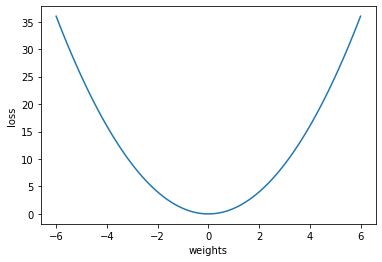

In [ ]:
# plot of simple function
from numpy import arange
from matplotlib import pyplot
 
# loss function L
def loss_fn(w):
	return w**2.0
 
# define range for input
w_min, w_max = -6.0, 6.0
weights = arange(w_min, w_max+0.1, 0.1)

# compute values of loss function at given weights
loss_values = loss_fn(weights)

# create a line plot of weights vs loss
pyplot.plot(weights, loss_values)
pyplot.xlabel('weights')
pyplot.ylabel('loss')
# show the plot
pyplot.show()

2.  Implementing Gradient Descent Algorithm

In [ ]:
# loss function L
def loss_fn(w):
	return w**2.0

# the gradient function delta
def eval_delta_fn(w):
	return w * 2.0

# gradient descent algorithm
def gradient_descent(loss_fn, eval_delta_fn, n_iter, step_size):
	# generate an initial point
	weights = 3
 	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = eval_delta_fn(weights)
		# take a step
		weights = weights - step_size * gradient
		# evaluate loss at candidate weight
		weights_eval = loss_fn(weights)
		# report progress
		print('>%d L(%s) = %.5f' % (i, weights, weights_eval))
	return [weights, weights_eval]
 
# define range for input
bounds = np.asarray([[-6.0, 6.0]])
# define the total iterations
n_iter = 35
# define the step size
step_size = 0.1
# perform the gradient descent search
bestW, loss_bestW = gradient_descent(loss_fn, eval_delta_fn, n_iter, step_size)
print('Done!')
print('L(%s) = %f' % (bestW, loss_bestW))

>0 L(2.4) = 5.76000
>1 L(1.92) = 3.68640
>2 L(1.536) = 2.35930
>3 L(1.2288000000000001) = 1.50995
>4 L(0.9830400000000001) = 0.96637
>5 L(0.7864320000000001) = 0.61848
>6 L(0.6291456000000001) = 0.39582
>7 L(0.5033164800000001) = 0.25333
>8 L(0.40265318400000005) = 0.16213
>9 L(0.32212254720000005) = 0.10376
>10 L(0.25769803776000005) = 0.06641
>11 L(0.20615843020800004) = 0.04250
>12 L(0.16492674416640002) = 0.02720
>13 L(0.13194139533312002) = 0.01741
>14 L(0.10555311626649602) = 0.01114
>15 L(0.08444249301319681) = 0.00713
>16 L(0.06755399441055746) = 0.00456
>17 L(0.05404319552844596) = 0.00292
>18 L(0.04323455642275677) = 0.00187
>19 L(0.03458764513820541) = 0.00120
>20 L(0.02767011611056433) = 0.00077
>21 L(0.022136092888451465) = 0.00049
>22 L(0.017708874310761173) = 0.00031
>23 L(0.014167099448608939) = 0.00020
>24 L(0.011333679558887151) = 0.00013
>25 L(0.009066943647109721) = 0.00008
>26 L(0.007253554917687777) = 0.00005
>27 L(0.005802843934150222) = 0.00003
>28 L(0.004642275

3.  Explore the learning rate (step size)

**See effects of various learning rates especially very small (1e-5) and very big (1.0)**

4.  We can store all the weights and loss computed at those weights to visualize

>0 L(-4.0) = 16.00000
>1 L(-3.2) = 10.24000
>2 L(-2.56) = 6.55360
>3 L(-2.048) = 4.19430
>4 L(-1.6384) = 2.68435
>5 L(-1.31072) = 1.71799
>6 L(-1.0485760000000002) = 1.09951
>7 L(-0.8388608000000002) = 0.70369
>8 L(-0.6710886400000001) = 0.45036
>9 L(-0.5368709120000001) = 0.28823
>10 L(-0.4294967296000001) = 0.18447
>11 L(-0.3435973836800001) = 0.11806
>12 L(-0.27487790694400005) = 0.07556
>13 L(-0.21990232555520003) = 0.04836
>14 L(-0.17592186044416003) = 0.03095
>15 L(-0.140737488355328) = 0.01981
>16 L(-0.11258999068426241) = 0.01268
>17 L(-0.09007199254740993) = 0.00811
>18 L(-0.07205759403792794) = 0.00519
>19 L(-0.057646075230342354) = 0.00332
>20 L(-0.04611686018427388) = 0.00213
>21 L(-0.03689348814741911) = 0.00136
>22 L(-0.029514790517935284) = 0.00087
>23 L(-0.02361183241434823) = 0.00056
>24 L(-0.018889465931478583) = 0.00036
>25 L(-0.015111572745182867) = 0.00023
>26 L(-0.012089258196146294) = 0.00015
>27 L(-0.009671406556917036) = 0.00009
>28 L(-0.007737125245533628) = 0

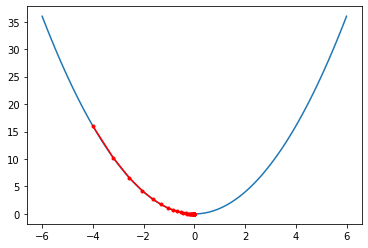

In [ ]:
# loss function L
def loss_fn(w):
	return w**2.0

# the gradient function delta
def eval_delta_fn(w):
	return w * 2.0

# gradient descent algorithm
def gradient_descent(loss_fn, eval_delta_fn, bounds, n_iter, step_size):
  # track all solutions
	weights_list, weights_eval_list = list(), list()
	# generate an initial point
	weights = -5
  # bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = eval_delta_fn(weights)
		# take a step
		weights = weights - step_size * gradient
		# evaluate loss at candidate weight
		weights_eval = loss_fn(weights)
    # store solution
		weights_list.append(weights)
		weights_eval_list.append(weights_eval)
		# report progress
		print('>%d L(%s) = %.5f' % (i, weights, weights_eval))
	return [weights_list, weights_eval_list]
 
# define range for input
bounds = np.asarray([[-6.0, 6.0]])
# define the total iterations
n_iter = 35
# define the step size
step_size = 0.1
# perform the gradient descent search
weights_list, weights_eval_list = gradient_descent(loss_fn, eval_delta_fn, bounds, n_iter, step_size)

# sample input range uniformly at 0.1 increments
input_w = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute values of loss function at given weights
loss_values = loss_fn(input_w)
# create a line plot of input vs result
pyplot.plot(input_w, loss_values)
# plot the solutions found
pyplot.plot(weights_list, weights_eval_list, '.-', color='red')
# show the plot
pyplot.show()